# CSC 575 Intelligent Information Retrieval
# Homework #2
## 1. Word Frequency

The TED dataset "ted_main.csv" contains information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017,including number of views, number of comments, short descriptions, speaker names and titles. 

Write code to obtain the following information of the words and tokens that appeared in the description of all talks (in the 'description' column in the dataset) after processing the text in the specified ways.  Essentially, your task is to fill the following this table:

In [1]:
import pandas as pd
ted_raw = pd.read_csv('C:/Users/skhongro/Documents/575/ted_main.csv', encoding = 'utf8')
print(ted_raw.columns)
ted_raw.head()

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [2]:
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
ted_raw['description'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skhongro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skhongro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    Sir Ken Robinson makes an entertaining and pro...
1    With the same humor and humanity he exuded in ...
2    New York Times columnist David Pogue takes aim...
3    In an emotionally charged talk, MacArthur-winn...
4    You've never seen data presented like this. Wi...
Name: description, dtype: object

In [4]:
nobs = len(ted_raw['description'])
docs_token = [None] * nobs
docs_token_raw = [None] * nobs
docs_token_stem = [None] * nobs
porter = nltk.PorterStemmer()

for i in range(0,nobs):
    docs_token_raw[i] = word_tokenize(ted_raw['description'][i])
    # filter English stopwords + lowercase
    docs_token[i] = [w.lower() for w in docs_token_raw[i] if w not in stopwords.words('english')] 
    # filter tokens that contain non-alphabetic character(s)
    docs_token[i] = [w for w in docs_token[i] if w.isalpha()] 
    docs_token_stem[i] = [porter.stem(tok) for tok in docs_token[i]] # apply stemmer

print(docs_token_raw[0])
print(docs_token[0])
print(docs_token_stem[0])

['Sir', 'Ken', 'Robinson', 'makes', 'an', 'entertaining', 'and', 'profoundly', 'moving', 'case', 'for', 'creating', 'an', 'education', 'system', 'that', 'nurtures', '(', 'rather', 'than', 'undermines', ')', 'creativity', '.']
['sir', 'ken', 'robinson', 'makes', 'entertaining', 'profoundly', 'moving', 'case', 'creating', 'education', 'system', 'nurtures', 'rather', 'undermines', 'creativity']
['sir', 'ken', 'robinson', 'make', 'entertain', 'profoundli', 'move', 'case', 'creat', 'educ', 'system', 'nurtur', 'rather', 'undermin', 'creativ']


<!--regex: class="(.*?)"-->
<table>
		<tbody>
        <tr style="text-align:center">
			<td>&nbsp;</td>
			<td valign="top">[A]<br>Word tokenization<br>(only)</td>
			<td valign="top">[B]<br>Word tokenization<br>+ 
			Case folding<br>(lower-case)<br>+ Stopword filtering<br>+ Non-alphabet 
			filtering </td>
			<td valign="top">[C]<br>Word tokenization<br>+ 
			Case folding<br>(lower-case)<br>+ Stopword filtering<br>+ Non-alphabet 
			filtering <br>+ Porter stemming<br></td>
		</tr>
		<tr>
			<td>(1) Total # of tokens</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td>(2) Size of vocabulary</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td>(3) Top 20 most common <br>token types with 
			frequency (list <br>in descending order of frequency)</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td>(4) Percentage of tokens in the <br>dataset 
			that is covered by the<br>top 20 token types</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
			<td>&nbsp;</td>
		</tr>
	</tbody></table>
    
    
NOTES:
* IMPORTANT: When you open the dataset file, you must give an optional parameter encoding='utf-8' (because the file contains some characters which are not ascii).
* Do not include the header row in the dataset.
* Relevant functionality in NLTK to use: functions sent_tokenize() and word_tokenize() in package ntlk.tokenize; class PorterStemmer in package nltk.stem.porter; the stopwords corpus in package nltk.corpus.
* For 'Non-alphabet filtering', use the function 'isalpha()' in Python.

In [95]:
def token_counter(docs_token_raw):
    print('[1] '+str(len([token for doc_t in docs_token_raw for token in doc_t]))) # -> sum(fdist.values())
    # Count frequencies of the vocabulary terms
    fdist = nltk.FreqDist([token for doc_t in docs_token_raw for token in doc_t])
    # fdist is essentially a Python dictionary
    tfpairs = fdist.items()
    print('[2] '+str(len(tfpairs))) # number of unique tokens
    print('[3] '+str(fdist.most_common(20)))
    print('[4] '+str(round(sum([item[1] for item in fdist.most_common(20)])/sum(fdist.values())*100,2))+'%')
    print()
    
token_counter(docs_token_raw)
token_counter(docs_token)
token_counter(docs_token_stem)

[1] 151998
[2] 17877
[3] [(',', 7382), ('.', 5764), ('the', 5395), ('and', 4264), ('of', 3651), ('to', 3528), ('a', 3505), ('in', 1762), ('--', 1485), ('that', 1472), ("'s", 1217), ('for', 1140), ('``', 898), ("''", 893), ('with', 879), ('we', 878), ('is', 834), ('it', 833), ('?', 824), ('this', 812)]
[4] 31.2%

[1] 78432
[2] 14818
[3] [('in', 762), ('talk', 700), ('us', 643), ('world', 515), ('new', 415), ('says', 411), ('people', 332), ('shares', 326), ('the', 306), ('shows', 282), ('life', 274), ('one', 272), ('ted', 254), ('like', 251), ('make', 239), ('way', 227), ('he', 224), ('human', 205), ('but', 205), ('work', 203)]
[4] 8.98%

[1] 78432
[2] 10678
[3] [('talk', 880), ('in', 762), ('us', 643), ('world', 527), ('say', 453), ('make', 449), ('share', 444), ('new', 415), ('show', 371), ('use', 360), ('work', 356), ('peopl', 334), ('human', 330), ('way', 326), ('one', 307), ('stori', 307), ('the', 306), ('live', 282), ('help', 281), ('life', 274)]
[4] 10.72%



### Based on the results you obtained, answer the following questions.  Answer in detail.
#### Did the size of vocabulary (2) decrease significantly from [A] to [B]?  Why do you think it did/didn't?
The size decreased signigicantly because tokens are eliminated by filtering and are merged by case-folding.

#### Did the size of vocabulary (2) decrease significantly from [B] to [C]?  Why do you think it did/didn't?
The size decreased signigicantly because vacabs are stemmed and are merged into roots. For instance, having [entertainer, entertaining, entertainment] merged into one vocabulary

#### How did the percentage of the top 20 token types (4) change from [B] to [C]?  What do you think influenced the change?
Because the stemming reduces the number of vocabulary and the number of tokens are the same, it is trivial that the most occured words would have more percentage share. For instance, talk in [B] only include tokens as 'talk' exact match whereas 'talk' in [C] might include [talk, talked, talks] in which is stemmed into a single vocabulary 'talk'.

| # 	| [A] 	| [B] 	| [C] 	|
|---|---|---|---|
| (1) # of tokens 	| 151998 	| 78432 	| 78432 	|
| (2) Size of vocab 	| 17877 	| 14818 	| 10678 	|
| (3) Top 20 common 	| [(',',   7382),      ('.', 5764),      ('the', 5395),      ('and', 4264),      ('of', 3651),      ('to', 3528),      ('a', 3505),      ('in', 1762),      ('--', 1485),      ('that', 1472),      ("'s", 1217),      ('for', 1140),      ('``', 898),      ("''", 893),      ('with', 879),      ('we', 878),      ('is', 834),      ('it', 833),      ('?', 824),      ('this', 812)] 	| [('in', 762),      ('talk', 700),      ('us', 643),      ('world', 515),      ('new', 415),      ('says', 411),      ('people', 332),      ('shares', 326),      ('the', 306),      ('shows', 282),      ('life', 274),      ('one', 272),      ('ted', 254),      ('like', 251),      ('make', 239),      ('way', 227),      ('he', 224),      ('human', 205),      ('but', 205),      ('work', 203)] 	| [('talk', 880),      ('in', 762),      ('us', 643),      ('world', 527),      ('say', 453),      ('make', 449),      ('share', 444),      ('new', 415),      ('show', 371),      ('use', 360),      ('work', 356),      ('peopl', 334),      ('human', 330),      ('way', 326),      ('one', 307),      ('stori', 307),      ('the', 306),      ('live', 282),      ('help', 281),      ('life', 274)] 	|
| (4)   % top 20 tokens in ds 	| 31.20% 	| 8.98% 	| 10.72% 	|

## 2. Word cloud

Using the tags associated with talks in the TED dataset, create a word cloud for tags 'climate change' and 'AI'. 

There are many tools and reference sites available that help you create word clouds (such as this, this and a search result).  Any will do.  You pick one and figure out how to use it.

Make one cloud for each tag.  Copy/paste the generated clouds in your submission file.

NOTE:

* Entries in the tags column are strings (e.g. "['children', 'creativity', 'culture' ]"), NOT lists.  So you have to first convert the string representation of a list (of strings) into a real list.  This site shows you how.
* Each talk is tagged with several tags.   Take all talks (their descriptions) whose tags indicated in the dataset include 'climate change' or 'AI'.
* Text/string processing (e.g. case-folding, stemming) is not necessary for this problem, but if you like to do some, you are more than welcome to do so.
* For your interest, here is my simple word cloud for 'AI'.

<img alt="" height="202" src="http://condor.depaul.edu/ntomuro/courses/575/assign/ai-cloud.png" width="385">

In [127]:
from wordcloud import WordCloud
ted_raw['tags'].head()

0    ['children', 'creativity', 'culture', 'dance',...
1    ['alternative energy', 'cars', 'climate change...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['Africa', 'Asia', 'Google', 'demo', 'economic...
Name: tags, dtype: object

In [183]:
# convert string representation of list to list in Python
# https://www.tutorialspoint.com/How-to-convert-string-representation-of-list-to-list-in-Python
import ast
str(ted_raw['tags'].head()[1])
ast.literal_eval(str(ted_raw['tags'].head()[1]))
# for items in tags:
#     print(ast.literal_eval(items))
    
# print(([tag for items in tags for tag in ast.literal_eval(items)]))

['alternative energy',
 'cars',
 'climate change',
 'culture',
 'environment',
 'global issues',
 'science',
 'sustainability',
 'technology']

We can expect to see the following terms in the word cloud in big fonts

In [179]:
fdist = nltk.FreqDist([tag for items in tags for tag in ast.literal_eval(items)])
fdist.most_common(10)

[('technology', 727),
 ('science', 567),
 ('global issues', 501),
 ('culture', 486),
 ('TEDx', 450),
 ('design', 418),
 ('business', 348),
 ('entertainment', 299),
 ('health', 236),
 ('innovation', 229)]

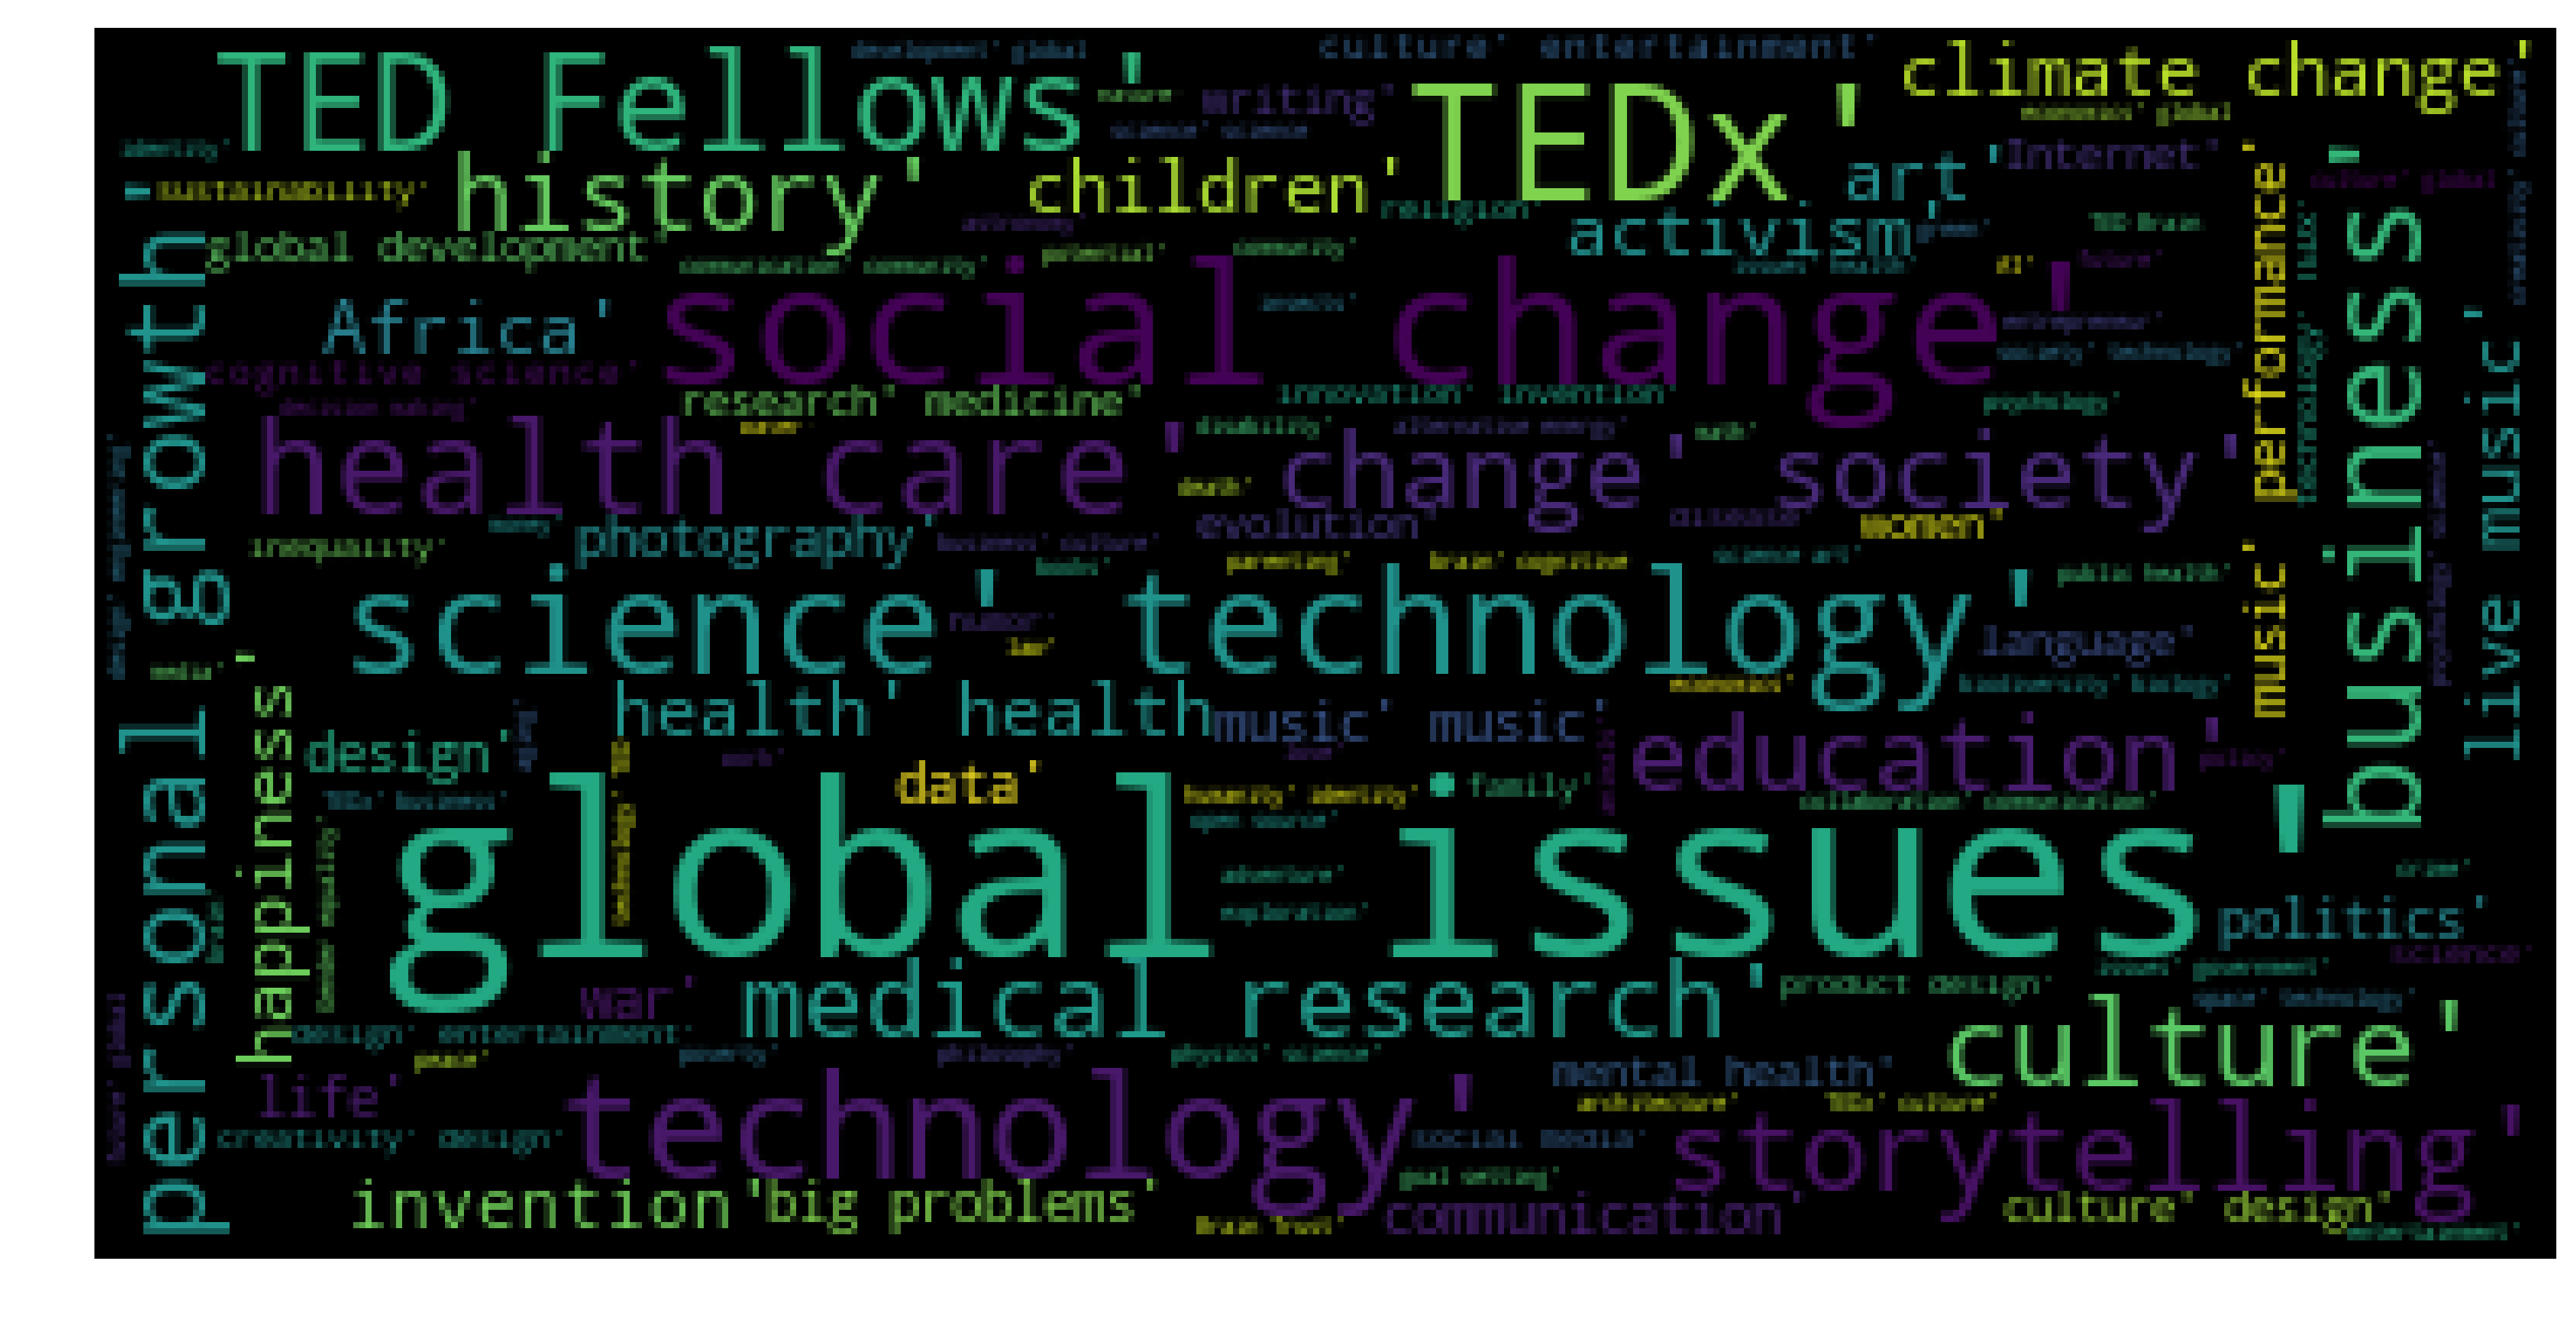

In [189]:
import matplotlib.pyplot as plt
import ast

tags = ted_raw['tags']
wordcloud = WordCloud().generate(str(([tag for items in tags for tag in ast.literal_eval(items)])))
# for items in tags:
#     print(items)
#     for tag in items.split(','):
#         print(tag)

# WordCloud().generate(([tag for items in tags for tag in items.split(',')]))
plt.figure(figsize=(16, 8), dpi=300)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3. Inverted Index

#### Create an inverted index for the TED dataset, using the text processing scheme [C] in the first problem (i.e, with Porter stemming) and the url of the talk as the document name.    The index will consist of the following files:

NOTES: Since inverted index uses the ID of the terms and documents, you probably have to do the task in a few steps, where you store intermediate results in some data structures or write in temporary files.  Any way is fine, as long as you accomplish the task.
IMPORTANT: When you write "term_index.csv" and "inverted_index.csv", you have to open the file (for writing) with an optional parameter encoding='utf-8'.


#### 1. A file that maps each term name to: the term ID and the document frequency.  Assign a series of positive integers to the term names.  Store each term name per line.  Name the file "TED_term_index.csv".  The first couple of lines in the file should look like this:

```
a, 1, 2
aakash, 2, 1
aala, 3, 1
aamodt, 4, 1
aaron, 5, 4
```

In [239]:
f = open("TED_term_index.csv","w")
fdist = nltk.FreqDist([token for doc_t in docs_token_stem for token in doc_t])
tfpairs = fdist.items()

i = 1
for tf in sorted(tfpairs):
    print(tf[0] + ", " + str(i) + ", " + str(tf[1]))
    f.write(tf[0] + ", " + str(i) + ", " + str(tf[1]))
    i+=1
    
f.close()

a, 1, 129
aakash, 2, 1
aala, 3, 1
aamodt, 4, 1
aaron, 5, 4
aaronson, 6, 1
ababa, 7, 1
abalon, 8, 1
abandon, 9, 11
abani, 10, 2
abdi, 11, 1
abduct, 12, 1
abdul, 13, 1
abe, 14, 1
abha, 15, 1
abhor, 16, 1
abigail, 17, 2
abil, 18, 35
abl, 19, 25
aboard, 20, 5
abod, 21, 1
abort, 22, 2
abouelnaga, 23, 1
about, 24, 2
abov, 25, 3
abraham, 26, 3
abram, 27, 1
abramović, 28, 1


UnicodeEncodeError: 'charmap' codec can't encode character '\u0107' in position 8: character maps to <undefined>

#### 2.  A file that maps each document ID to: the document name.  Assign a series of positive integers to the documents.  Store each document ID per line.  Name the file "TED_doc_index.csv".  The first couple of lines in the file should look like this:

```
1, https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity
2, https://www.ted.com/talks/al_gore_on_averting_climate_crisis
3, https://www.ted.com/talks/david_pogue_says_simplicity_sells
```

In [241]:
f=open("TED_doc_index.csv","w")
i=1
for url in ted_raw['url']:
    print(str(i)+", "+url,end ="")
    f.write(str(i)+", "+url)
    i+=1
f.close()

1, https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity
2, https://www.ted.com/talks/al_gore_on_averting_climate_crisis
3, https://www.ted.com/talks/david_pogue_says_simplicity_sells
4, https://www.ted.com/talks/majora_carter_s_tale_of_urban_renewal
5, https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen
6, https://www.ted.com/talks/tony_robbins_asks_why_we_do_what_we_do
7, https://www.ted.com/talks/julia_sweeney_on_letting_go_of_god
8, https://www.ted.com/talks/joshua_prince_ramus_on_seattle_s_library
9, https://www.ted.com/talks/dan_dennett_s_response_to_rick_warren
10, https://www.ted.com/talks/rick_warren_on_a_life_of_purpose
11, https://www.ted.com/talks/cameron_sinclair_on_open_source_architecture
12, https://www.ted.com/talks/jehane_noujaim_inspires_a_global_day_of_film
13, https://www.ted.com/talks/larry_brilliant_wants_to_stop_pandemics
14, https://www.ted.com/talks/jeff_han_demos_his_breakthrough_touchscreen
15, https://www.ted.com/talks

1833, https://www.ted.com/talks/gail_reed_where_to_train_the_world_s_doctors_cuba
1834, https://www.ted.com/talks/nancy_kanwisher_the_brain_is_a_swiss_army_knife
1835, https://www.ted.com/talks/daria_van_den_bercken_why_i_take_the_piano_on_the_road_and_in_the_air
1836, https://www.ted.com/talks/thomas_piketty_new_thoughts_on_capital_in_the_twenty_first_century
1837, https://www.ted.com/talks/meaghan_ramsey_why_thinking_you_re_ugly_is_bad_for_you
1838, https://www.ted.com/talks/pia_mancini_how_to_upgrade_democracy_for_the_internet_era
1839, https://www.ted.com/talks/dilip_ratha_the_hidden_force_in_global_economics_sending_money_home
1840, https://www.ted.com/talks/glenn_greenwald_why_privacy_matters
1841, https://www.ted.com/talks/jeff_iliff_one_more_reason_to_get_a_good_night_s_sleep
1842, https://www.ted.com/talks/myriam_sidibe_the_simple_power_of_hand_washing
1843, https://www.ted.com/talks/jorge_soto_the_future_of_early_cancer_detection
1844, https://www.ted.com/talks/melissa_flemin

#### 3. The inverted index file that maps each term ID to its postings list.  Each posting should contain a document ID and the term frequency in that document.  Look at the lecture slides ("Implementation.pptx"), slide 5 for the scheme.   Store one term ID per line.  Name the file "TED_inverted_index.csv".  The first couple of lines in the file should look like this:

```
1, 1146, 1, 2429, 1
2, 1878, 1
3, 2381, 1
4, 1655, 1
5, 810, 1, 943, 1, 951, 1, 1717, 1
```

In [263]:
docs_token_stem

[['sir',
  'ken',
  'robinson',
  'make',
  'entertain',
  'profoundli',
  'move',
  'case',
  'creat',
  'educ',
  'system',
  'nurtur',
  'rather',
  'undermin',
  'creativ'],
 ['with',
  'humor',
  'human',
  'exud',
  'an',
  'inconveni',
  'truth',
  'al',
  'gore',
  'spell',
  'way',
  'individu',
  'address',
  'climat',
  'chang',
  'immedi',
  'buy',
  'hybrid',
  'invent',
  'new',
  'hotter',
  'brand',
  'name',
  'global',
  'warm'],
 ['new',
  'york',
  'time',
  'columnist',
  'david',
  'pogu',
  'take',
  'aim',
  'technolog',
  'worst',
  'offend',
  'provid',
  'encourag',
  'exampl',
  'product',
  'get',
  'right',
  'to',
  'funni',
  'thing',
  'burst',
  'song'],
 ['in',
  'emot',
  'charg',
  'talk',
  'activist',
  'majora',
  'carter',
  'detail',
  'fight',
  'environment',
  'justic',
  'south',
  'bronx',
  'show',
  'minor',
  'neighborhood',
  'suffer',
  'flaw',
  'urban',
  'polici'],
 ['you',
  'never',
  'seen',
  'data',
  'present',
  'like',
  'w

In [486]:
from collections import Counter
word_count_dict = {}

# Built index by appending docId into dict which may include duplicates
for i in range(0,len(docs_token_stem)):
    for word in docs_token_stem[i]:
        word_count_dict.setdefault(word,[]).append(i)

# Calculate freq within docs
word_count_dict['grand']


# [doc_ids for doc_ids in word_count_dict['grand']]
i = 1
for key in sorted(word_count_dict.keys()):
    print(key)
    c = (Counter(docid for docid in word_count_dict[key]))
    print(str(i)+", "+', '.join([str(i) for item in c.items() for i in (list(item))]))
    if(key=='abil'):
        break
    i+=1


    
# print(  str(list(Counter(docid for docid in word_count_dict[key]).items())[0])[1:-1]  )
# c = (Counter(docid for docid in word_count_dict[key]).items())

# Counter(docid for docid in word_count_dict[key]).keys

# print(Counter(docid for docid in word_count_dict[key]).keys())

# c = (Counter(docid for docid in word_count_dict['abandon']))
# print()
# print([item for item in c.items()])
# print()
# for item in c.items():
# #     print (str(item[0])+" "+str(item[1]),end=" ")
#     print(','.join([str(i) for i in (list(item))]),end=" ")
#     print 
# print()
# print(list(c))
# # '.'.join(list(c.items()))
# # '.'.join(list(c))
# # for item in c.items():
# #     print(item[])



a
1, 35, 1, 59, 1, 86, 1, 96, 1, 131, 2, 209, 1, 260, 1, 331, 1, 349, 1, 354, 1, 364, 1, 380, 1, 396, 1, 397, 1, 403, 1, 553, 1, 620, 1, 680, 1, 694, 1, 697, 1, 706, 1, 740, 1, 747, 1, 769, 1, 837, 1, 843, 1, 846, 1, 850, 1, 873, 2, 915, 1, 936, 1, 937, 1, 954, 1, 960, 1, 982, 1, 983, 1, 985, 1, 1020, 1, 1034, 1, 1035, 1, 1044, 1, 1050, 1, 1093, 1, 1132, 1, 1145, 1, 1150, 1, 1172, 1, 1180, 1, 1187, 1, 1199, 1, 1275, 1, 1303, 1, 1341, 1, 1349, 1, 1369, 1, 1391, 1, 1399, 1, 1401, 1, 1403, 1, 1412, 1, 1468, 1, 1485, 1, 1493, 1, 1514, 1, 1529, 1, 1533, 1, 1543, 1, 1546, 1, 1555, 1, 1576, 1, 1578, 1, 1599, 1, 1605, 1, 1612, 1, 1618, 1, 1621, 1, 1629, 1, 1677, 1, 1680, 1, 1694, 1, 1712, 1, 1716, 1, 1718, 1, 1746, 1, 1761, 1, 1765, 1, 1776, 1, 1784, 1, 1801, 1, 1807, 1, 1814, 1, 1819, 1, 1824, 1, 1841, 1, 1876, 1, 1879, 1, 1881, 1, 1885, 1, 1920, 1, 1964, 1, 1965, 1, 1981, 1, 2026, 1, 2036, 1, 2081, 1, 2126, 1, 2144, 1, 2145, 2, 2152, 1, 2164, 1, 2169, 1, 2222, 1, 2230, 1, 2253, 1, 2289, 1, 2

Deliverables

Submit the following: (1) Your answer file; (2) Three output files for problem 3; and (3) Your source code file(s).

(1) Your answer file must:

 be a/ONE PDF file. 
have your name, the course name (CSC 575) and section number, and the assignment number (HW#2).  If this information is missing, your submission will be returned UNGRADED.
include your overall comments, for instance, how difficult you felt this assignment was, and any particular difficulties you encountered.  Write in well-written English prose.
(2) Three output files must be comma separated.

(3) Your source code file must have your name, the course name (CSC 575) and section number, and the assignment number (HW#2) at the top of the file (in the comment section).  If you used Jupyter Notebook, submit the html version of the code in addition to the ipynb file.